In [457]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [458]:
distribution = stats.expon

In [459]:
def binned_cdf(x1, x2):
    return distribution.cdf(x2, scale=1 / la) - distribution.cdf(x1, scale=1 / la)

In [460]:
n = 10000
bin_count = 20

In [461]:
rng = np.random.default_rng(seed=42)

#### An example walk-through using lambda=5

In [462]:
values = rng.random(size=n)

In [463]:
la = 5

In [464]:
x = np.log(values) / la * (-1)

In [465]:
x

array([0.05124804, 0.16470656, 0.03049091, ..., 0.35994184, 0.19701544,
       0.14641595])

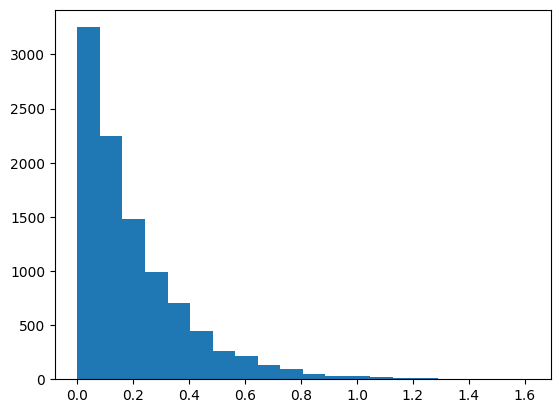

In [466]:
count, bins, _ = plt.hist(x, bins=bin_count)

In [467]:
x.mean()

0.20123401839699828

In [468]:
x.std()

0.19942482685145302

In [469]:
bc = binned_cdf(bins[:-1], bins[1:])
# bc = bc + (1 - bc.sum()) / (bc.size)
bc = bc / (bc.sum() * bin_count / (bc.size))
bc;

In [470]:
stats.chisquare(count, bc * n)

Power_divergenceResult(statistic=19.548102328670325, pvalue=0.42221654977397344)

#### Using random lambdas
(note the p-values < 0.05; makes sense to think about some type of correction)

In [471]:
for i in range(5):
    values = rng.random(size=n)
    la = round(rng.random()/1.5*(i+0.1), 2)

    x = np.log(values) / la * (-1)

    count, bins = np.histogram(x, bins=bin_count)

    bc = binned_cdf(bins[:-1], bins[1:])
    bc = bc / (bc.sum() * bin_count / (bc.size))

    # print(la, stats.chisquare(count, bc * n))

    print(f'---set lambda to be {la}---')
    print(f'mean: {x.mean():.1f} (expected {distribution.mean(scale=1/la):.1f})')
    print(f'std : {x.std():.1f} (expected {distribution.std(scale=1/la):.1f})')

    print(stats.chisquare(count, bc * n))

    print()

---set lambda to be 0.05---
mean: 19.9 (expected 20.0)
std : 20.4 (expected 20.0)
Power_divergenceResult(statistic=55.34126291121474, pvalue=2.060553306221414e-05)

---set lambda to be 0.31---
mean: 3.2 (expected 3.2)
std : 3.3 (expected 3.2)
Power_divergenceResult(statistic=23.186300142754586, pvalue=0.22923574975167052)

---set lambda to be 0.15---
mean: 6.7 (expected 6.7)
std : 6.7 (expected 6.7)
Power_divergenceResult(statistic=18.001457348738136, pvalue=0.5223409269597614)

---set lambda to be 0.29---
mean: 3.4 (expected 3.4)
std : 3.4 (expected 3.4)
Power_divergenceResult(statistic=9.825663907552881, pvalue=0.9571159196364023)

---set lambda to be 1.54---
mean: 0.7 (expected 0.6)
std : 0.7 (expected 0.6)
Power_divergenceResult(statistic=36.10890441878581, pvalue=0.01023512429941201)

